In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)


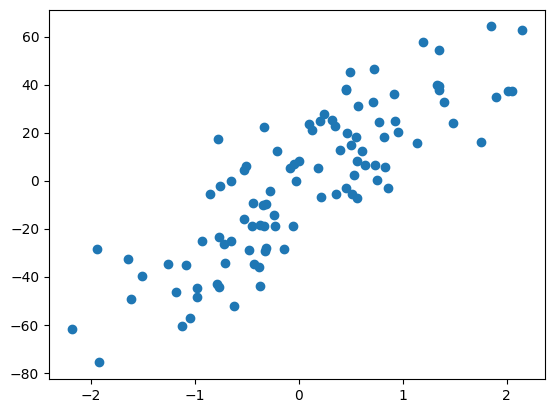

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
lr=LinearRegression()

In [6]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [7]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [8]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
            
        print(self.m,self.b)
    def predict( self,X):
        return self.m*X+self.b
   

    

In [9]:
gd=GDRegressor(0.001,50)

In [10]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [24]:
b=-120
m=100
lr=0.01
all_b=[]
all_m=[]
all_cost=[]

epochs = 30

for i in range(epochs):
    slope_b=0
    slope_m=0
    cost = 0
    
for j in range(X.shape[0]):
    slope_b=slope_b-2*(y[j]*(m*X[j])-b)
    slope_m=slope_m-2*(y[j]*(m*X[j])-b)*X[j]
    cost=cost+(y[j]-m*X[j]-b)**2
    
b=b-(lr*slope_b)
m=m-(lr*slope_m)
all_b.append(b)
all_m.append(m)
all_cost.append(cost)
    

NameError: name 'FuncAnimation' is not defined

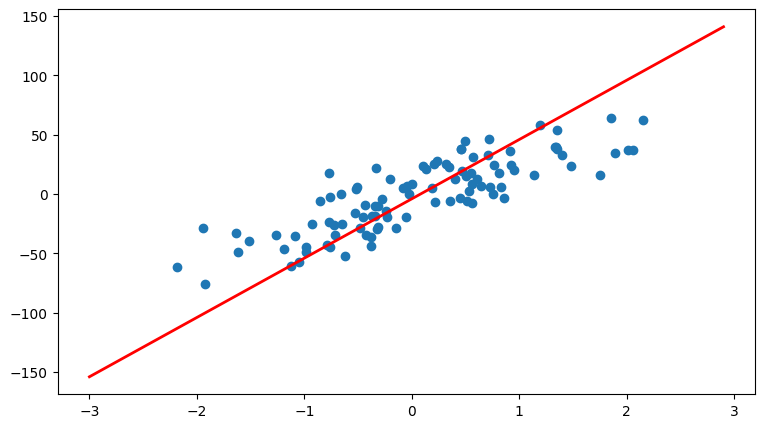

In [34]:
fig,ax=plt.subplots(figsize=(9,5))
x_i=np.arange(-3,3,0.1)
y_i=x_i*(-27)-150
ax.scatter(X,y)
line,=ax.plot(x_i,x_i*50-4,'r-',linewidth=2)
def update(i):
        label='epoch{0}',format(i+1)
        line.set_ydata(x_i*all_m[i]+all_b[i])
        ax.set_xlabel(label)
        
#anim=FuncAnimation(fig,update,repeat=True,frames=epochs,interval=500)        
        